In [1]:
import os
import pandas as pd
import numpy as np
import math


In [2]:
path = '/Users/user/Documents/AI/אפקה/רפואיות/training'
path_a = '/Users/user/Documents/AI/אפקה/רפואיות/training/training_setA'
path_b = '/Users/user/Documents/AI/אפקה/רפואיות/training/training_setB'

# Pre Processing

## files_a is alist of the files in path_a

In [3]:
files_a=os.listdir(path_a)
files_b=os.listdir(path_b)


In [4]:
# Omitting lines that are not comming to all patients
data=[]
for i in files_a:
    data.append(pd.read_csv(path_a+'/'+i,sep = '|'))
    data[-1].drop(['EtCO2','Fibrinogen', 'Unit1', 'Unit2', 'BaseExcess', 'Hct', 'Hgb', 'PTT', 
    'WBC', 'pH','HCO3','FiO2', 'PaCO2', 'Platelets', 'Magnesium',  'Phosphate',  'Potassium', 
    'Bilirubin_total',  'TroponinI','SaO2', 'AST','BUN', 'Alkalinephos', 'Bilirubin_direct','Glucose', 'ICULOS', 'HospAdmTime',
    'Lactate', 'Calcium',  'Chloride', 'Creatinine' ],axis = 1,inplace = True)


In [5]:
for i in files_b:
    data.append(pd.read_csv(path_b+'/'+i,sep = '|'))
    data[-1].drop(['EtCO2','Fibrinogen', 'Unit1', 'Unit2', 'BaseExcess', 'Hct', 'Hgb', 'PTT', 
    'WBC', 'pH','HCO3','FiO2', 'PaCO2', 'Platelets', 'Magnesium',  'Phosphate',  'Potassium', 
    'Bilirubin_total',  'TroponinI','SaO2', 'AST','BUN', 'Alkalinephos', 'Bilirubin_direct','Glucose', 'ICULOS', 'HospAdmTime',
    'Lactate', 'Calcium',  'Chloride', 'Creatinine' ],axis = 1,inplace = True)

In [6]:
# checking for NaNs:
# 1. Omitting all pateints that have more than 60% data missing in entire df
# 2. Omitting all pateints that lack a column,
# 3. omitting first rows that are missing 7 first features
# 4. omitting first row if contains NaNs
# 5. Interpolating and filling remanining NaNs.

In [7]:
#i - goes over all the patients
datacopy=[]
for i in range(len(data)):
    # checking for first row without data
    #if data[i].isnull().sum(axis=1)[0]>0:
    #    data[i]=data[i].drop([0])
    # check if total number of NaNs exceeds 60 percent, or a missing column, then drop patient
    if (data[i].isnull().sum().sum()>0.8*data[i].shape[0]*data[i].shape[1]) or ((data[i].isnull().sum()>0.8*data[i].shape[0]).any()):
        KK=1
        # checking if any of the columns has more than 60% NaNs:
  #or if (data[i].isnull().sum()>0.6*data[i].shape[0]).any():
    else:
          datacopy.append(data[i])
#    while (datacopy[i].isnull().sum(axis=1)[1]).any()>0:
#       datacopy[i]=datacopy[i].drop([0])
    
    

  

In [8]:
# Interpolate and fill remaining NaNs with mean

In [9]:
for k in range (len(datacopy)):
    datacopy[k].interpolate
    datacopy[k]=datacopy[k].fillna(datacopy[k].mean())

In [10]:
len(datacopy)

26277

# Building new dfs

In [ ]:
# Building new dfs: 
# seperating septic from non-septic
# if septic, finding time of sepsis
# for non-septic, taking first 20 times. For septic, taking last 20 times before sepsis.
# Building new dfs: for each time, df will contain patients against features.
# Introducing new features: first derivative, second derivative.

In [11]:
# seperating septic from non-septic:
sick=[]
healthy=[]
for i in range (len(datacopy)):
    if datacopy[i]['SepsisLabel'].sum()==0:
        healthy.append(datacopy[i])
    else:
        sick.append(datacopy[i])




In [12]:
len(sick)

2000

In [13]:
len (healthy)

24277

## Building new dfs, for each time relating patients to features

In [ ]:
# sample 1280 entries from non-septic, for data size matching.

In [14]:
# Building dfs containing last 20 before sepsis for sick, and first 20 for healthy.
# finding first time of sepsis
sick20=[]
healthy20=[]
#sick20
for i in range (len(sick)):
    sepsis_time=sick[i]['SepsisLabel'].argmax()
    # Taking 20 values before sepsis
    sick20.append(sick[i].iloc[sepsis_time-21:sepsis_time-1])
for i in range (len(healthy)):
    healthy20.append(healthy[i].iloc[0:20])


In [15]:
# checking if df has less than 20 hours. if so - omitted from dataset
counts=0
for i in reversed(range(len(sick20))) : 
    if sick20[i].shape[0]<20:
        counts=counts+1
        del (sick20[i])
        #print (i)
counth=0
for i in reversed(range(len(healthy20))) : 
    if healthy20[i].shape[0]<20:
        counth=counth+1
        del (healthy20[i])
        #print (i)



In [16]:
len(sick20)

1280

In [17]:
len(healthy20)

21732

In [18]:
# Building new dfs for each time, containing patients against features for sick
timesick=[]
#ddff - empty df containing column names only
ddff=pd.DataFrame(columns=sick20[0].columns).copy()
for i in range (20):
    #initializing dataframe with columns only for each time
    timesick.append(ddff)
#    print('I=',i)
#    time[i]=pd.DataFrame(columns=sick20[0].columns).copy()
        # filling dataframe row after row with all patients data relevant to this time.
    for j in range (len(sick20)):
 #       for k in range (sick20[0].shape[0]):
 #       print('J=',j)
        timesick[i]=timesick[i].append(sick20[j].iloc[i])
    timesick[i]=timesick[i].reset_index(drop=True)
      
        
        
        

In [19]:
# Building new dfs for each time, containing patients against features for healthy
timehealthy=[]
#ddff - empty df containing column names only
ddff=pd.DataFrame(columns=healthy20[0].columns).copy()
for i in range (20):
    #initializing dataframe with columns only for each time
    timehealthy.append(ddff)
#    print('I=',i)
#    time[i]=pd.DataFrame(columns=sick20[0].columns).copy()
        # filling dataframe row after row with all patients data relevant to this time.
    for j in range (len(healthy20)):
 #       for k in range (sick20[0].shape[0]):
 #       print('J=',j)
        timehealthy[i]=timehealthy[i].append(healthy20[j].iloc[i])
    timehealthy[i]=timehealthy[i].reset_index(drop=True)

In [20]:
timesick[0]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,SepsisLabel
0,112.647059,97.930672,37.618125,120.014706,81.674370,66.080000,24.194328,27.92,1.0,0.0
1,82.000000,100.000000,37.680000,114.000000,79.000000,62.000000,12.000000,65.79,1.0,0.0
2,88.000000,95.000000,38.287711,93.000000,72.000000,65.000000,26.000000,39.28,1.0,0.0
3,92.833333,96.900000,37.140000,125.111111,87.716667,73.944444,27.741379,56.46,0.0,0.0
4,99.000000,94.000000,37.348182,100.000000,68.000000,60.434783,16.000000,63.59,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1275,80.000000,100.000000,36.600000,166.000000,108.000000,75.000000,21.000000,56.00,0.0,0.0
1276,86.000000,96.838710,36.530612,94.633929,77.246988,65.035714,21.410569,47.00,1.0,0.0
1277,92.000000,95.000000,38.100000,104.000000,72.000000,59.000000,22.000000,76.00,0.0,0.0
1278,79.000000,95.000000,37.400000,129.000000,85.000000,39.000000,20.000000,69.00,0.0,0.0


In [21]:
timehealthy[0]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,SepsisLabel
0,60.954545,97.000000,36.165000,136.600000,66.704545,44.066667,14.236842,75.91,0.0,0.0
1,79.611111,95.431818,37.609375,140.033333,81.048000,54.392857,25.633333,45.82,0.0,0.0
2,102.444444,98.203704,36.455000,113.019231,67.147308,51.428571,18.884615,65.71,0.0,0.0
3,120.363636,95.409091,37.842143,110.130682,74.125000,59.627907,20.909091,64.24,1.0,0.0
4,76.342105,97.805556,36.294545,109.835526,66.000000,47.618421,16.592105,87.08,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21727,62.268293,94.926829,36.020000,147.804878,106.048780,78.073171,19.231707,76.00,1.0,0.0
21728,89.456522,98.086957,36.400000,131.366667,84.602273,71.922222,19.176471,84.00,0.0,0.0
21729,80.202381,96.255814,36.733333,157.526316,116.157895,88.644737,20.578947,60.00,0.0,0.0
21730,94.333333,92.722222,37.620000,141.722222,100.833333,74.416667,21.666667,84.00,0.0,0.0


## Changing sepsis for sick to 1 (will have different meaning than original one)
## Adding first and second derivative columns to each of the measured features.

In [ ]:
# changing sepsis column to 1 for timesick dfs.

In [22]:
for i in range (len(timesick)):
    timesick[i]['SepsisLabel']=1

In [23]:
df20=[]
for i in range (len(timesick)):
    df20.append(pd.concat([timesick[i],timehealthy[i]]))

In [24]:
df20[0]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,SepsisLabel
0,112.647059,97.930672,37.618125,120.014706,81.674370,66.080000,24.194328,27.92,1.0,1.0
1,82.000000,100.000000,37.680000,114.000000,79.000000,62.000000,12.000000,65.79,1.0,1.0
2,88.000000,95.000000,38.287711,93.000000,72.000000,65.000000,26.000000,39.28,1.0,1.0
3,92.833333,96.900000,37.140000,125.111111,87.716667,73.944444,27.741379,56.46,0.0,1.0
4,99.000000,94.000000,37.348182,100.000000,68.000000,60.434783,16.000000,63.59,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
21727,62.268293,94.926829,36.020000,147.804878,106.048780,78.073171,19.231707,76.00,1.0,0.0
21728,89.456522,98.086957,36.400000,131.366667,84.602273,71.922222,19.176471,84.00,0.0,0.0
21729,80.202381,96.255814,36.733333,157.526316,116.157895,88.644737,20.578947,60.00,0.0,0.0
21730,94.333333,92.722222,37.620000,141.722222,100.833333,74.416667,21.666667,84.00,0.0,0.0


# Logistic Regression

In [26]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import statsmodels.api as sm 
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

In [29]:
# X=df20[0].loc[:,['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender']]
# X

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender
0,112.647059,97.930672,37.618125,120.014706,81.674370,66.080000,24.194328,27.92,1.0
1,82.000000,100.000000,37.680000,114.000000,79.000000,62.000000,12.000000,65.79,1.0
2,88.000000,95.000000,38.287711,93.000000,72.000000,65.000000,26.000000,39.28,1.0
3,92.833333,96.900000,37.140000,125.111111,87.716667,73.944444,27.741379,56.46,0.0
4,99.000000,94.000000,37.348182,100.000000,68.000000,60.434783,16.000000,63.59,0.0
...,...,...,...,...,...,...,...,...,...
21727,62.268293,94.926829,36.020000,147.804878,106.048780,78.073171,19.231707,76.00,1.0
21728,89.456522,98.086957,36.400000,131.366667,84.602273,71.922222,19.176471,84.00,0.0
21729,80.202381,96.255814,36.733333,157.526316,116.157895,88.644737,20.578947,60.00,0.0
21730,94.333333,92.722222,37.620000,141.722222,100.833333,74.416667,21.666667,84.00,0.0


In [54]:
X=df20[19].loc[:,['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender']]
y=df20[19]['SepsisLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_scaled = scaler.transform(X_train)
lgr=LogisticRegression(max_iter=10000)
lgr.fit(X_train, y_train)
pred=lgr.predict(X_test)
sum(pred)

0.0

In [62]:
sum(y_test)

266.0

In [55]:
X_resampled, y_resampled = SMOTE().fit_sample(X, y)
X_resampled

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender
0,115.000000,98.000000,37.720000,139.000000,105.000000,85.000000,27.000000,27.920000,1.000000
1,97.000000,100.000000,37.560000,144.000000,85.000000,59.000000,16.370370,65.790000,1.000000
2,102.000000,95.000000,37.890000,131.368421,64.500000,70.254386,25.000000,39.280000,1.000000
3,87.000000,90.000000,37.140000,134.000000,108.000000,91.000000,28.000000,56.460000,0.000000
4,107.000000,96.918182,37.348182,117.562500,80.392857,60.434783,15.000000,63.590000,0.000000
...,...,...,...,...,...,...,...,...,...
43459,110.000000,100.000000,37.703098,171.929497,117.070503,88.176258,18.088129,32.559794,0.035252
43460,86.000000,96.157429,37.110661,114.760228,85.039357,67.813173,13.039357,29.232401,1.000000
43461,92.455537,93.138842,37.263633,118.088926,93.316695,68.366611,24.861158,64.856602,0.772232
43462,81.290648,99.128057,36.237439,125.032854,98.782442,89.096883,22.515587,40.374389,0.096883


In [57]:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=0)
lgr_re=LogisticRegression(max_iter=10000)
lgr_re.fit(X_train_re, y_train_re)
pred_re=lgr_re.predict(X_test_re)
sum(pred_re)

4326.0

In [63]:
sum(y_test)

266.0

In [58]:
log_reg = sm.Logit(y_train, X_train).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.209500
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            SepsisLabel   No. Observations:                18409
Model:                          Logit   Df Residuals:                    18400
Method:                           MLE   Df Model:                            8
Date:                Sat, 20 Mar 2021   Pseudo R-squ.:                 0.01742
Time:                        20:57:54   Log-Likelihood:                -3856.7
converged:                       True   LL-Null:                       -3925.1
Covariance Type:            nonrobust   LLR p-value:                 1.112e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
HR             0.0145      0.002      7.179      0.000       0.011       0.018
O2Sat         -0.0335      0.

In [59]:
roc_auc_score(y_test,pred)

0.5

In [60]:
log_reg = sm.Logit(y_train_re, X_train_re).fit() 
print(log_reg.summary()) 

Optimization terminated successfully.
         Current function value: 0.672699
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            SepsisLabel   No. Observations:                34771
Model:                          Logit   Df Residuals:                    34762
Method:                           MLE   Df Model:                            8
Date:                Sat, 20 Mar 2021   Pseudo R-squ.:                 0.02949
Time:                        20:57:58   Log-Likelihood:                -23390.
converged:                       True   LL-Null:                       -24101.
Covariance Type:            nonrobust   LLR p-value:                1.179e-301
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
HR             0.0137      0.001     18.939      0.000       0.012       0.015
O2Sat         -0.0437      0.

In [61]:
roc_auc_score(y_test_re,pred_re)

0.6135855547959123

In [ ]:
X_resampled, y_resampled = SMOTE().fit_sample(X, y)
X_resampled

In [ ]:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=0)
lgr_re=LogisticRegression()
lgr_re.fit(X_train_re, y_train_re)
pred_re=lgr_re.predict(X_test_re)
pred_re

In [ ]:
# Adding first and second derivatives to measured features

In [ ]:
#TTT.head()

In [64]:

# # i runs on all times
for i in range (len(timesick)):
    # k runs on all rows
    HR1=[]
    O2Sat1=[]
    Temp1=[]
    SBP1=[]
    MAP1=[]
    DBP1=[]
    Resp1=[]

    HR1.append(timesick[i].at[0,'HR'])
    O2Sat1.append(timesick[i].at[0,'O2Sat'])
    Temp1.append(timesick[i].at[0,'Temp'])
    SBP1.append(timesick[i].at[0,'SBP'])
    MAP1.append(timesick[i].at[0,'MAP'])
    DBP1.append(timesick[i].at[0,'DBP'])
    Resp1.append(timesick[i].at[0,'Resp'])   
    for j in range (1,timesick[i].shape[0]):
        HR1.append(timesick[i].at[j,'HR']-timesick[i].at[j-1,'HR'])
        O2Sat1.append(timesick[i].at[j,'O2Sat']-timesick[i].at[j-1,'O2Sat'])
        Temp1.append(timesick[i].at[j,'Temp']-timesick[i].at[j-1,'Temp'])
        SBP1.append(timesick[i].at[j,'SBP']-timesick[i].at[j-1,'SBP'])
        MAP1.append(timesick[i].at[j,'MAP']-timesick[i].at[j-1,'MAP'])
        DBP1.append(timesick[i].at[j,'DBP']-timesick[i].at[j-1,'DBP'])
        Resp1.append(timesick[i].at[j,'Resp']-timesick[i].at[j-1,'Resp'])
    timesick[i]['HR1'] = HR1
    timesick[i]['O2Sat1'] = O2Sat1
    timesick[i]['Temp1'] = Temp1
    timesick[i]['SBP1'] = SBP1
    timesick[i]['MAP1'] = MAP1
    timesick[i]['DBP1'] = DBP1
    timesick[i]['Resp1'] = Resp1

In [65]:

# # i runs on all times
for i in range (len(timesick)):
    # k runs on all rows

    HR2=[]
    O2Sat2=[]
    Temp2=[]
    SBP2=[]
    MAP2=[]
    DBP2=[]
    Resp2=[]
    HR2.append(timesick[i].at[0,'HR1'])
    O2Sat2.append(timesick[i].at[0,'O2Sat1'])
    Temp2.append(timesick[i].at[0,'Temp1'])
    SBP2.append(timesick[i].at[0,'SBP1'])
    MAP2.append(timesick[i].at[0,'MAP1'])
    DBP2.append(timesick[i].at[0,'DBP1'])
    Resp2.append(timesick[i].at[0,'Resp1'])   
    for j in range (1,timesick[i].shape[0]):
        HR2.append(timesick[i].at[j,'HR1']-timesick[i].at[j-1,'HR1'])
        O2Sat2.append(timesick[i].at[j,'O2Sat1']-timesick[i].at[j-1,'O2Sat1'])
        Temp2.append(timesick[i].at[j,'Temp1']-timesick[i].at[j-1,'Temp1'])
        SBP2.append(timesick[i].at[j,'SBP1']-timesick[i].at[j-1,'SBP1'])
        MAP2.append(timesick[i].at[j,'MAP1']-timesick[i].at[j-1,'MAP1'])
        DBP2.append(timesick[i].at[j,'DBP1']-timesick[i].at[j-1,'DBP1'])
        Resp2.append(timesick[i].at[j,'Resp1']-timesick[i].at[j-1,'Resp1'])
    timesick[i]['HR2'] = HR2
    timesick[i]['O2Sat2'] = O2Sat2
    timesick[i]['Temp2'] = Temp2
    timesick[i]['SBP2'] = SBP2
    timesick[i]['MAP2'] = MAP2
    timesick[i]['DBP2'] = DBP2
    timesick[i]['Resp2'] = Resp2

In [66]:
len(timehealthy)

20

In [67]:
# # i runs on all times
for i in range (len(timehealthy)):
    # k runs on all rows
    HR1=[]
    O2Sat1=[]
    Temp1=[]
    SBP1=[]
    MAP1=[]
    DBP1=[]
    Resp1=[]

    HR1.append(timehealthy[i].at[0,'HR'])
    O2Sat1.append(timehealthy[i].at[0,'O2Sat'])
    Temp1.append(timehealthy[i].at[0,'Temp'])
    SBP1.append(timehealthy[i].at[0,'SBP'])
    MAP1.append(timehealthy[i].at[0,'MAP'])
    DBP1.append(timehealthy[i].at[0,'DBP'])
    Resp1.append(timehealthy[i].at[0,'Resp'])   
    for j in range (1,timehealthy[i].shape[0]):
        HR1.append(timehealthy[i].at[j,'HR']-timehealthy[i].at[j-1,'HR'])
        O2Sat1.append(timehealthy[i].at[j,'O2Sat']-timehealthy[i].at[j-1,'O2Sat'])
        Temp1.append(timehealthy[i].at[j,'Temp']-timehealthy[i].at[j-1,'Temp'])
        SBP1.append(timehealthy[i].at[j,'SBP']-timehealthy[i].at[j-1,'SBP'])
        MAP1.append(timehealthy[i].at[j,'MAP']-timehealthy[i].at[j-1,'MAP'])
        DBP1.append(timehealthy[i].at[j,'DBP']-timehealthy[i].at[j-1,'DBP'])
        Resp1.append(timehealthy[i].at[j,'Resp']-timehealthy[i].at[j-1,'Resp'])
    timehealthy[i]['HR1'] = HR1
    timehealthy[i]['O2Sat1'] = O2Sat1
    timehealthy[i]['Temp1'] = Temp1
    timehealthy[i]['SBP1'] = SBP1
    timehealthy[i]['MAP1'] = MAP1
    timehealthy[i]['DBP1'] = DBP1
    timehealthy[i]['Resp1'] = Resp1

In [68]:
# # i runs on all times
for i in range (len(timesick)):
    # k runs on all rows

    HR2=[]
    O2Sat2=[]
    Temp2=[]
    SBP2=[]
    MAP2=[]
    DBP2=[]
    Resp2=[]
    HR2.append(timehealthy[i].at[0,'HR1'])
    O2Sat2.append(timehealthy[i].at[0,'O2Sat1'])
    Temp2.append(timehealthy[i].at[0,'Temp1'])
    SBP2.append(timehealthy[i].at[0,'SBP1'])
    MAP2.append(timehealthy[i].at[0,'MAP1'])
    DBP2.append(timehealthy[i].at[0,'DBP1'])
    Resp2.append(timehealthy[i].at[0,'Resp1'])   
    for j in range (1,timehealthy[i].shape[0]):
        HR2.append(timehealthy[i].at[j,'HR1']-timehealthy[i].at[j-1,'HR1'])
        O2Sat2.append(timehealthy[i].at[j,'O2Sat1']-timehealthy[i].at[j-1,'O2Sat1'])
        Temp2.append(timehealthy[i].at[j,'Temp1']-timehealthy[i].at[j-1,'Temp1'])
        SBP2.append(timehealthy[i].at[j,'SBP1']-timehealthy[i].at[j-1,'SBP1'])
        MAP2.append(timehealthy[i].at[j,'MAP1']-timehealthy[i].at[j-1,'MAP1'])
        DBP2.append(timehealthy[i].at[j,'DBP1']-timehealthy[i].at[j-1,'DBP1'])
        Resp2.append(timehealthy[i].at[j,'Resp1']-timehealthy[i].at[j-1,'Resp1'])
    timehealthy[i]['HR2'] = HR2
    timehealthy[i]['O2Sat2'] = O2Sat2
    timehealthy[i]['Temp2'] = Temp2
    timehealthy[i]['SBP2'] = SBP2
    timehealthy[i]['MAP2'] = MAP2
    timehealthy[i]['DBP2'] = DBP2
    timehealthy[i]['Resp2'] = Resp2

In [ ]:
# timehealthy[0].head()

In [ ]:
## preparing new dfs containing sick and healthy for each time, for logistic regression

In [69]:
df20=[]
for i in range (len(timesick)):
    df20.append(pd.concat([timesick[i],timehealthy[i]]))

In [96]:
#df20[0].columns

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import statsmodels.api as sm 
from sklearn import preprocessing

In [87]:
X=df20[19].loc[:,['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender','HR1', 'O2Sat1', 'Temp1', 'SBP1', 'MAP1', 'DBP1','Resp1', 'HR2', 'O2Sat2', 'Temp2', 'SBP2', 'MAP2', 'DBP2', 'Resp2']]
y=df20[19]['SepsisLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
lgr=LogisticRegression(max_iter=10000)
lgr.fit(X_train, y_train)
pred=lgr.predict(X_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [88]:
sum(pred)

1.0

In [89]:
sum(y_test)

266.0

In [90]:
log_reg = sm.Logit(y_train, X_train).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.201276
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            SepsisLabel   No. Observations:                18409
Model:                          Logit   Df Residuals:                    18386
Method:                           MLE   Df Model:                           22
Date:                Sat, 20 Mar 2021   Pseudo R-squ.:                 0.05599
Time:                        21:11:27   Log-Likelihood:                -3705.3
converged:                       True   LL-Null:                       -3925.1
Covariance Type:            nonrobust   LLR p-value:                 2.713e-79
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
HR             0.0406      0.004     11.413      0.000       0.034       0.048
O2Sat         -0.1154      0.

In [ ]:
# try again without gender and MAP2

In [122]:
X=df20[19].loc[:,['HR', 'O2Sat', 'Temp', 'SBP', 'DBP', 'Resp','HR1', 'O2Sat1','SBP1', 'DBP1','Resp1', 'HR2', 'O2Sat2', 'SBP2', 'DBP2', 'Resp2']]
y=df20[19]['SepsisLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
lgr=LogisticRegression(max_iter=10000)
lgr.fit(X_train, y_train)
pred=lgr.predict(X_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [114]:
sum(pred)

1.0

In [115]:
sum(y_test)

266.0

In [123]:
log_reg = sm.Logit(y_train, X_train).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.201436
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            SepsisLabel   No. Observations:                18409
Model:                          Logit   Df Residuals:                    18393
Method:                           MLE   Df Model:                           15
Date:                Mon, 22 Mar 2021   Pseudo R-squ.:                 0.05524
Time:                        20:09:52   Log-Likelihood:                -3708.2
converged:                       True   LL-Null:                       -3925.1
Covariance Type:            nonrobust   LLR p-value:                 5.689e-83
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
HR             0.0416      0.003     11.966      0.000       0.035       0.048
O2Sat         -0.1039      0.

In [117]:
X_resampled, y_resampled = SMOTE().fit_sample(X, y)
X_resampled

,HR,O2Sat,SBP,DBP,Resp,HR1,O2Sat1,SBP1,DBP1,Resp1,HR2,O2Sat2,SBP2,DBP2,Resp2
0,115.000000,98.000000,139.000000,85.000000,27.000000,115.000000,98.000000,139.000000,85.000000,27.000000,115.000000,98.000000,139.000000,85.000000,27.000000
1,97.000000,100.000000,144.000000,59.000000,16.370370,-18.000000,2.000000,5.000000,-26.000000,-10.629630,-133.000000,-96.000000,-134.000000,-111.000000,-37.629630
2,102.000000,95.000000,131.368421,70.254386,25.000000,5.000000,-5.000000,-12.631579,11.254386,8.629630,23.000000,-7.000000,-17.631579,37.254386,19.259259
3,87.000000,90.000000,134.000000,91.000000,28.000000,-15.000000,-5.000000,2.631579,20.745614,3.000000,-20.000000,0.000000,15.263158,9.491228,-5.629630
4,107.000000,96.918182,117.562500,60.434783,15.000000,20.000000,6.918182,-16.437500,-30.565217,-13.000000,35.000000,11.918182,-19.069079,-51.310831,-16.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43459,76.889009,98.204912,107.666811,45.296409,12.037214,-37.110991,4.649308,17.370402,-1.629598,-14.147988,-60.963003,6.982497,54.962786,3.846877,-22.851579
43460,76.923580,98.847160,141.089500,59.847160,21.197590,8.242340,1.847160,15.229260,-7.847160,4.722143,16.286060,4.000000,12.993460,-6.917040,3.233616
43461,73.273853,96.878975,137.455390,64.455390,14.363074,-38.242049,-1.242049,29.363074,6.788207,5.060512,-50.878975,-6.181537,25.665635,11.515902,20.743597
43462,111.345608,89.806418,115.465543,54.539190,35.847974,20.497634,-1.193582,-30.539190,-16.156759,12.732772,35.000000,4.460810,-8.497634,-11.115203,14.193582


In [118]:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=0)
lgr_re=LogisticRegression(max_iter=10000)
lgr_re.fit(X_train_re, y_train_re)
pred_re=lgr_re.predict(X_test_re)
pred_re

array([1., 0., 0., ..., 1., 1., 1.])

In [119]:
sum(pred_re)

4314.0

In [120]:
sum(y_test_re)

4291.0

In [121]:
roc_auc_score(y_test_re,pred_re)

0.6370389097729036

In [181]:
AUC=[]
log_reg=[]
for i in range (len(df20)):
    X=df20[i].loc[:,['HR', 'O2Sat', 'Temp', 'SBP', 'DBP', 'Resp','HR1', 'O2Sat1','SBP1', 'DBP1','Resp1', 'HR2', 'O2Sat2', 'SBP2', 'DBP2', 'Resp2']]
    y=df20[i]['SepsisLabel']
    X_resampled, y_resampled = SMOTE().fit_sample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=0)
#    scaler = preprocessing.StandardScaler().fit(X_train)
#    X_scaled = scaler.transform(X_train)
    lgr=LogisticRegression(max_iter=10000)
    lgr.fit(X_train, y_train)
    pred=lgr.predict(X_test)
    log_reg.append(sm.Logit(y_train, X_train).fit())
    AUC.append(roc_auc_score(y_test,pred))

Optimization terminated successfully.
         Current function value: 0.582776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.527483
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545868
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.578615
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.595899
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.609863
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.608297
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.617293
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.618955
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.620023
  

In [185]:
for i in range (20):
    print(log_reg[i].summary())

                           Logit Regression Results                           
Dep. Variable:            SepsisLabel   No. Observations:                34771
Model:                          Logit   Df Residuals:                    34755
Method:                           MLE   Df Model:                           15
Date:                Mon, 22 Mar 2021   Pseudo R-squ.:                  0.1592
Time:                        21:28:00   Log-Likelihood:                -20264.
converged:                       True   LL-Null:                       -24101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
HR             0.0342      0.001     23.186      0.000       0.031       0.037
O2Sat         -0.2121      0.006    -34.516      0.000      -0.224      -0.200
Temp           0.4415      0.017     26.354      0.0

                           Logit Regression Results                           
Dep. Variable:            SepsisLabel   No. Observations:                34771
Model:                          Logit   Df Residuals:                    34755
Method:                           MLE   Df Model:                           15
Date:                Mon, 22 Mar 2021   Pseudo R-squ.:                  0.1070
Time:                        21:28:00   Log-Likelihood:                -21522.
converged:                       True   LL-Null:                       -24101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
HR             0.0350      0.001     26.544      0.000       0.032       0.038
O2Sat         -0.1602      0.006    -27.626      0.000      -0.172      -0.149
Temp           0.2511      0.016     16.169      0.0

                           Logit Regression Results                           
Dep. Variable:            SepsisLabel   No. Observations:                34771
Model:                          Logit   Df Residuals:                    34755
Method:                           MLE   Df Model:                           15
Date:                Mon, 22 Mar 2021   Pseudo R-squ.:                 0.08096
Time:                        21:28:00   Log-Likelihood:                -22150.
converged:                       True   LL-Null:                       -24101.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
HR             0.0426      0.001     31.896      0.000       0.040       0.045
O2Sat         -0.0768      0.005    -14.313      0.000      -0.087      -0.066
Temp           0.0465      0.014      3.233      0.0

In [129]:
AUC

[0.7123301298079483,
 0.7544643485816229,
 0.7303490468676396,
 0.7079620278107099,
 0.6861859998596007,
 0.6663791092606262,
 0.6735712120430841,
 0.6600438022546689,
 0.660681237347783,
 0.6640016386272166,
 0.6642924430760747,
 0.6518960100655504,
 0.6692872331605801,
 0.6547767635121893,
 0.652586333133252,
 0.6649279458257729,
 0.6613373076431541,
 0.6372278823707915,
 0.6563895290916154,
 0.6522318937039592]

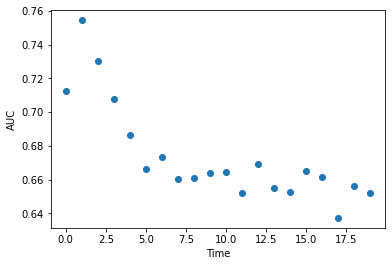

In [180]:
tim=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
import matplotlib.pyplot as plt
plt.scatter(tim, AUC)
plt.xlabel("Time")
plt.ylabel("AUC")
plt.show()
